### Regularized Logistic Regression

Hypothesis Function:
 - $h_\Theta(x) = g(\Theta^Tx)$  where  $g(z) = \frac{1}{(1+e^{-z})}$ - Sigmoid Function

Cost Function:
 - $J(\Theta) = \frac{1}{m} \sum_{i=1}^{m} [ -y^{(i)}log(h_{\Theta}(x^{(i)})) - (1 - y^{(i)})log(1 - (h_{\Theta}(x^{(i)}))] + \frac{\lambda}{2m} \sum_{j=1}^n \Theta_j^2$ - Binary Cross-Entropy Cost Function with Regularization Term

Optimization Algorithm:
 - $\Theta_j := \Theta_j - \frac{1}{m} \sum_{i=1}^{m} (h_{\Theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ for $j=0$

 - $\Theta_j := \Theta_j - \frac{1}{m} \sum_{i=1}^{m} (h_{\Theta}(x^{(i)}) - y^{(i)})x_j^{(i)} + \frac{\lambda}{m}\Theta_j$ for $j\geq 1$

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
plt.rcParams["figure.figsize"] = (16, 8)

In [60]:
df = pd.read_csv("regularized_data.csv", header=None)

In [61]:
df.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [62]:
df.describe()

,0,1,2
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


In [63]:
df.columns = ["Test 1","Test 2","Accepted"]

In [64]:
df.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


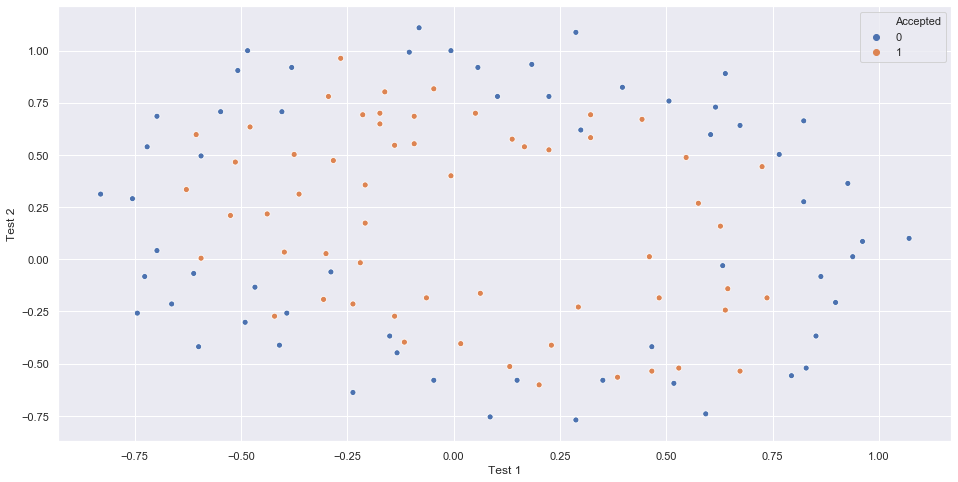

In [65]:
sns.scatterplot(data=df, x="Test 1", y="Test 2", hue="Accepted")

In [66]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values.reshape(118, 1)

In [67]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))    

### Adding Polynomial Terms

In [68]:
def mapFeature(x1, x2, degree):
    n = len(x1)
    out = np.ones((n, 1))
    for i in range(1, degree + 1):
        for j in range(i + 1):
            terms= (x1**(i-j) * x2**j).reshape(len(x1),1)
            out= np.hstack((out,terms))
    return out

In [69]:
X = mapFeature(X[:,0], X[:,1], 6)

### Compute Cost

In [70]:
def computeCost(X, y, theta, Lambda):
    m = len(y)
    y_hat = sigmoid(np.dot(X, theta))
    error = - (y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    cost = (1 / m) * np.sum(error)
    regularizedCost = cost + Lambda / (2 * m) * np.sum(theta**2)
    return regularizedCost

### Matrix of Features, Labels and Weights

In [71]:
m, n = X.shape[0], X.shape[1]
theta = np.zeros((n, 1))

### Gradient Descent

In [72]:
def gradientDescent(X, y, theta, learningRate, numberOfIterations, Lambda):
    m = len(y)
    cost_history = []
    for i in range(numberOfIterations):
        y_hat = sigmoid(np.dot(X, theta))
        j_b = np.dot(X.T, (y_hat - y))[0] * (1 / m)
        j_w = np.dot(X.T, (y_hat - y))[1:] * (1 / m) + Lambda * (1 / m) * theta[1:]
        gradient = np.vstack((j_b, j_w))
        theta -= gradient * learningRate
        cost_history.append(computeCost(X, y, theta, Lambda))
    return theta, cost_history

In [73]:
theta, cost_history = gradientDescent(X, y, theta, 1, 800, 0.2)

Text(0.5, 1.0, 'Cost function using Gradient Descent')

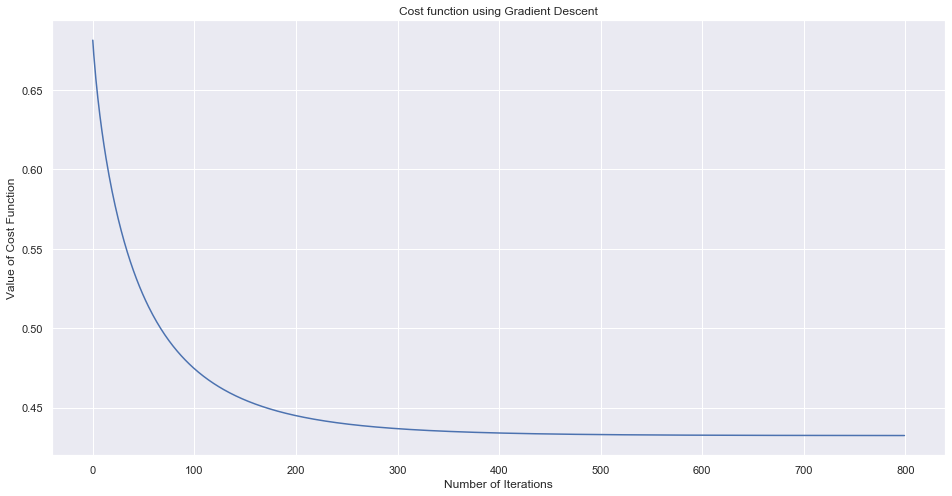

In [74]:
plt.plot(cost_history)
plt.xlabel("Number of Iterations")
plt.ylabel("Value of Cost Function")
plt.title("Cost function using Gradient Descent")

### Decision Boundary

In [75]:
def mapFeaturePlot(x1,x2,degree):
    out = np.ones(1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j)
            out= np.hstack((out,terms))
    return out

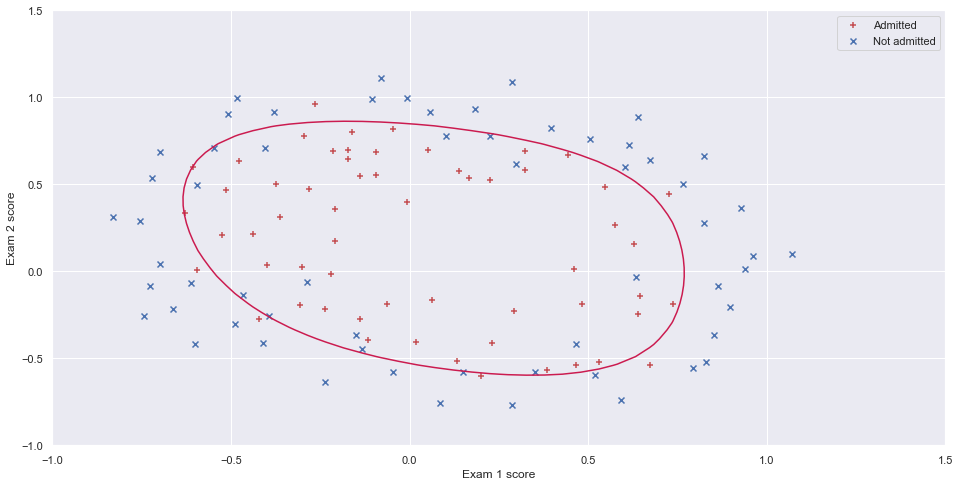

In [76]:
pos , neg = (y==1).reshape(118,1) , (y==0).reshape(118,1)
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="x",label="Not admitted")

u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
z=np.zeros((len(u_vals),len(v_vals)))
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] =mapFeaturePlot(u_vals[i],v_vals[j],6) @ theta 

plt.contour(u_vals,v_vals,z.T,0)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)

### Predictions

In [77]:
def classify(X):
    y_pred = np.dot(X, theta)
    return y_pred > 0

In [78]:
print(f"Training Accuracy is {round(np.sum(classify(X) == y) / 118 * 100, 2)} %")

Training Accuracy is 83.05 %
